# Rank Features
```Rank1D``` と ```Rank2D``` は、スケール [-1, 1] または [0, 1] で特徴をスコアリングするさまざまなメトリクスを使用して、単一の特徴または特徴のペアを評価します。 ランク付けされました。 SPLOM と同様の概念で、スコアは左下の三角形のヒートマップ上に視覚化されるため、下流の分析でフィーチャのペア間のパターンを簡単に識別できます。

この例では、UCI Machine Learning リポジトリからのクレジット デフォルト データ セットを使用して、機能をランク付けします。 以下のコードは、インスタンス行列とターゲット ベクトルを作成します。

| Kind | Data type |
| ---- | ---- |
| Visualizers | ```Rank1D```, ```Rank2D``` |
| Quick Methods | ```rank1d()```, ```rank2d()``` |
| Models | General Linear Models |
| Workflow | Feature engineering and model selection |

* [API Reference](https://www.scikit-yb.org/en/latest/api/features/rankd.html#module-yellowbrick.features.rankd)

## Rank 1D
特徴の一次元ランキングでは、一度に 1 つの特徴のみを考慮するランキング アルゴリズム (ヒストグラム分析など) が利用されます。 デフォルトでは、Shapiro-Wilk アルゴリズムを利用して、フィーチャに関するインスタンスの分布の正規性を評価します。 次に、各特徴の相対的なランクを示す棒グラフが描画されます。

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\yellowbrick\features\rankd.py:279: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  ranking_methods = {"shapiro": lambda X: np.array([shapiro(x)[0] for x in X.T])}


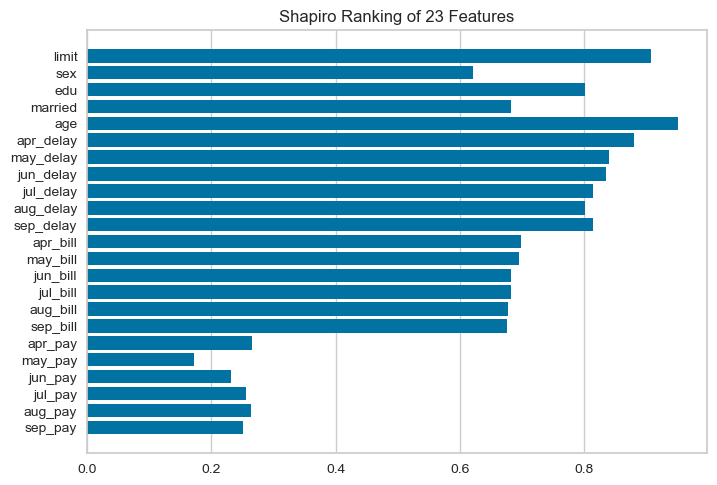

<Axes: title={'center': 'Shapiro Ranking of 23 Features'}>

In [1]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

# Load the credit dataset
X, y = load_credit()

# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

## Rank 2D
特徴の 2 次元ランキングでは、一度に特徴のペアを考慮するランキング アルゴリズムを利用します (ジョイント プロット分析など)。 次に、特徴のペアがスコアによってランク付けされ、特徴共起行列の左下の三角形を使用して視覚化されます。

デフォルトでは、```Rank2D``` ビジュアライザはピアソン相関スコアを利用して共線関係を検出します。

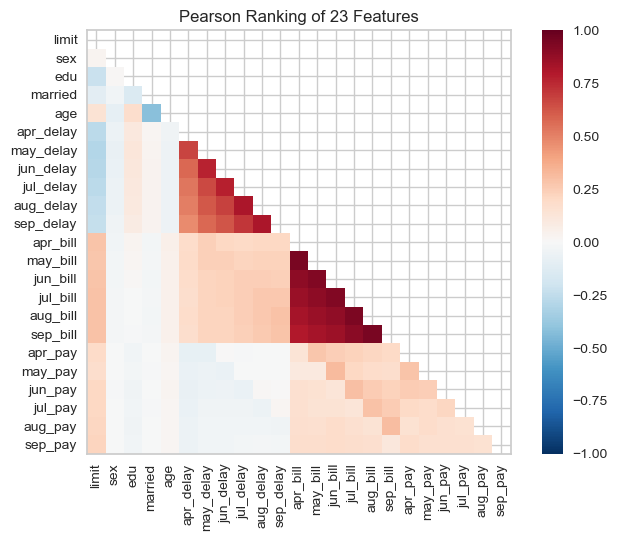

<Axes: title={'center': 'Pearson Ranking of 23 Features'}>

In [2]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

あるいは、共分散ランキング アルゴリズムを利用して、変量のそれぞれの平均からの偏差の積の平均値を計算することもできます。 共分散は、特徴間の共線関係を大まかに検出しようとします。 上記のピアソンからの出力を以下の共分散ランキングと比較してください。

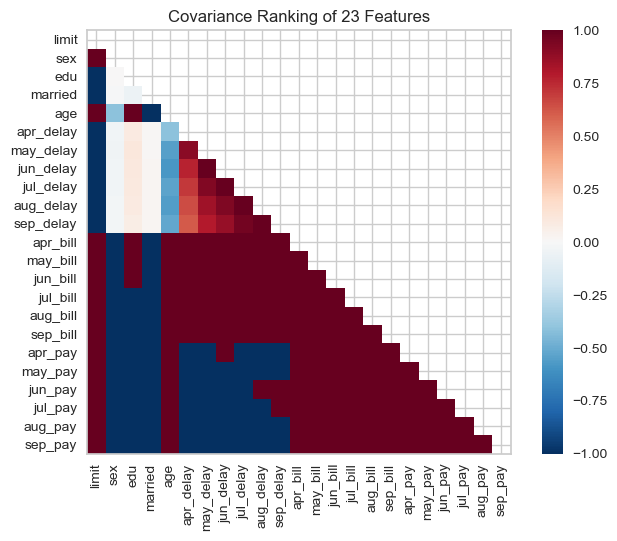

<Axes: title={'center': 'Covariance Ranking of 23 Features'}>

In [3]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

## Quick Methods
同様の機能は、1 行のクイックメソッド ```rank1d``` と ```rank2d``` を使用して実現できます。 これらの関数はインスタンスを作成して、それぞれのビジュアライザーをデータに適合させ、クラスベースの API を使用せずに即座に表示します。

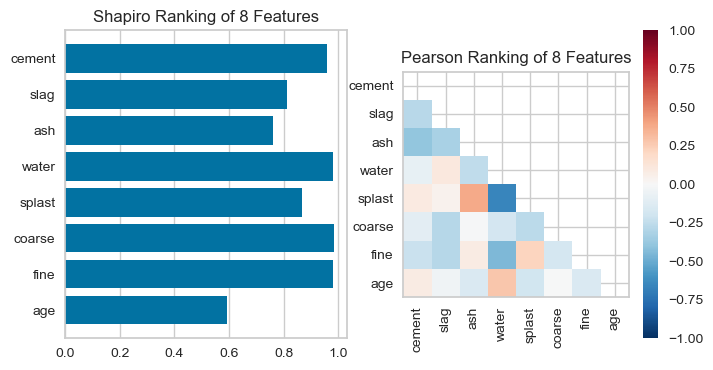

In [5]:
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d

# Load the concrete dataset
X, _ = load_concrete()

_, axes = plt.subplots(ncols=2, figsize=(8,4))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()